## **1. Descripción de Dataset**
- **Nombre**: ATENCIONES_CONSULTA_MAESTRIA.xlsx
- Fuente de información: MSP (Ministerio de Salud Pública, Hospital Miguel H. Alcivar Bahia de Caraquez - Sucre - Manabì - Ecuador.
- **Número de registros:** 154877
- **Número de variables:** 21
- **Contexto**
* Contiene información sobre los turnos agendados para consulta externa y emergencia en el periodo (enero- diciembre)2024 y (enero - marzo 2025).
* Incluye datos de Diagnostico, Tipo de cobertura de Salud, unidad de salud origen,  especialidad, tipo de atención, e información general.
Campos Clave:
* Variables de unidad de salud: unidad_rpis y parroquia
* Veriables de agendamiento: especialidad, fe_cita, estado
* Variables de diagnostico: cie10_diag, diag.
* Variables del paciente: estado_civil, nivel_educacion, sexo, edad, afiliacion, etc.


#Fase 1: Selección y carga de datos
##Objetivo: Identificar la estructura y el contenido del dataset data_consulta_atenciones_agendados.csv

In [66]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules #preparacion de los datos (one-hot encoding)
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:

df=pd.read_excel("/content/sample_data/ATENCIONES_CONSULTA_MAESTRIA.xlsx")

# Mostrar las 5 primeras filas
print("Mostrar las 5 primeras filas: ")
df.head()

Mostrar las 5 primeras filas: 


,especialidad,estado_civil,nivel_educacion,sexo,parroquia,fe_cita,estado,documento,edad,afiliacion,...,unidad_red_comple,origen_pac,tipo_atencion,id_registro,cie10_diag,diag,fecha_atencion,Medicamentos,Dispositivos,Insumos
0,CARDIOLOGIA,CASADO,NO REGISTRA,HOMBRE,CALCETA,2024/01/01,INCUMPLIDA,1310876667,48.0,NO APORTA,...,NaN,ESTABLECIMIENTO DE SALUD RPIS,PRIMERA,62,NaN,NaN,NaN,0,0,0
1,CARDIOLOGIA,SOLTERO,SUPERIOR 3ER NIVEL DE GRADO,HOMBRE,LEONIDAS PLAZA GUTIÉRREZ,2024/01/01,INCUMPLIDA,1310075344,44.0,"IESS, SEGURO GENERAL",...,NaN,ESTABLECIMIENTO DE SALUD RPIS,PRIMERA,63,NaN,NaN,NaN,0,0,0
2,CARDIOLOGIA,CASADO,NINGUNO,HOMBRE,CANOA,2024/01/02,ATENDIDA,1301811137,70.0,ES JUBILADO DEL IESS/SSC/ISSFA/ISSPOL,...,NaN,ESTABLECIMIENTO DE SALUD RPIS,PRIMERA,69,I10X,HIPERTENSION ESENCIAL (PRIMARIA),2024-01-02,0,0,0
3,NEUMOLOGIA,SOLTERO,EDU. BASICA (ELEM. Y MEDIA),HOMBRE,CHARAPOTÓ,2024/01/02,ATENDIDA,1312895814,36.0,NO APORTA,...,NaN,ESTABLECIMIENTO DE SALUD RPIS,PRIMERA,73,J310,RINITIS CRONICA,2024-01-02,0,0,0
4,CIRUGIA VASCULAR,CASADO,EDU. BASICO JOVENES Y ADULTOS,MUJER,PEDERNALES,2024/01/02,ATENDIDA,1717613754,42.0,NO APORTA,...,NaN,ESTABLECIMIENTO DE SALUD RPIS,PRIMERA,84,I872,INSUFICIENCIA VENOSA (CRONICA) (PERIFERICA),2024-01-02,0,0,0


# Mostrar el resumen de las estructura del dataframe




In [ ]:
print("\n Estructura del dataframe: ")
df.info()


 Estructura del dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154877 entries, 0 to 154876
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   especialidad       154877 non-null  object 
 1   estado_civil       154836 non-null  object 
 2   nivel_educacion    154877 non-null  object 
 3   sexo               154877 non-null  object 
 4   parroquia          154420 non-null  object 
 5   fe_cita            154877 non-null  object 
 6   estado             154877 non-null  object 
 7   documento          154877 non-null  object 
 8   edad               154876 non-null  float64
 9   afiliacion         154877 non-null  object 
 10  unidad_rpis        60665 non-null   object 
 11  unidad_red_comple  5 non-null       object 
 12  origen_pac         154877 non-null  object 
 13  tipo_atencion      154877 non-null  object 
 14  id_registro        154877 non-null  int64  
 15  cie10_diag         890

# Estadistica descriptiva de las variables numericas


# Fase 2: Procesamiento de datos
## Objetivos: Limpiar y transformar los datos para que estén listos para el análisis.

### Tarea principales
1. Manejo de valores faltantes:
* Reemplazo (imputación) o eliminación de registros
* Revisión de campos como unidad_rpis, unidad_red_comple, cie10_diag, diag,fecha_atencion, edad, estado_civil, parroquia, que segun la descripcion pueden estar vacias o erroneas.

2. Conversión de tipos de datos:
* Asegurar que las columnas como edad, sean numéricas (int or float).
* Convertir fechas (fe_cita) a tipo datetime.
3. Tratamiento de outliers(opcional)
* Revisar Variables como edad, para detectar valores extremos.

In [ ]:
# Manejo de valores faltantes
print("Valores nulos por columnas: ")
print(df.isnull().sum())

Valores nulos por columnas: 
especialidad              0
estado_civil             41
nivel_educacion           0
sexo                      0
parroquia               457
fe_cita                   0
estado                    0
documento                 0
edad                      1
afiliacion                0
unidad_rpis           94212
unidad_red_comple    154872
origen_pac                0
tipo_atencion             0
id_registro               0
cie10_diag            65800
diag                  65800
fecha_atencion        65799
Medicamentos              0
Dispositivos              0
Insumos                   0
dtype: int64


In [ ]:
# Primero verifica los valores únicos para asegurarte que 'REHABILITACION' está escrito exactamente así
print(df['estado'].unique())

['INCUMPLIDA' 'ATENDIDA']


In [ ]:


# Filtrar múltiples especialidades
df_new = df[~(
    df['especialidad'].str.lower().str.contains('rehabilitacion') |
    df['especialidad'].str.lower().str.contains('imagenologia') |
    df['especialidad'].str.lower().str.contains('laboratorio')
)]
# Verifica que el filtro funcionó
print(f"Filas antes del filtro: {len(df)}")
print(f"Filas después del filtro: {len(df_new)}")

# Eliminación de columnas innecesarias y con muchos datos nulos, se analiza y se deciden eliminar por que no son necesarias para los objetivos.
df_new = df_new.drop(["unidad_red_comple", "unidad_rpis", "fecha_atencion"], axis=1)
df_new.info()

['CARDIOLOGIA' 'NEUMOLOGIA' 'CIRUGIA VASCULAR' 'INFECTOLOGIA' 'FISIATRIA'
 'GINECOLOGIA' 'PSIQUIATRIA' 'CIRUGIA GENERAL' 'DERMATOLOGIA'
 'GASTROENTEROLOGIA' 'REUMATOLOGIA' 'GERIATRIA' 'COLOPROCTOLOGIA'
 'OFTALMOLOGIA' 'MEDICINA INTERNA' 'VALORACION PREQUIRURGICA'
 'ALERGOLOGIA' 'CIRUGIA MAXILOFACIAL' 'NEFROLOGIA' 'ANESTESIOLOGIA'
 'NEUROLOGIA' 'ENDOCRINOLOGIA' 'OTORRINOLARINGOLOGIA' 'PSICOLOGIA'
 'PEDIATRIA' 'IMAGENOLOGIA' 'ODONTOLOGIA' 'NUTRICION' 'TRAUMATOLOGIA'
 'CIRUGIA PEDIATRICA' 'UROLOGIA' 'NEONATOLOGIA' 'HEMATOLOGIA'
 'NEUROLOGIA PEDIATRICA' 'NEUROCIRUGIA' 'REHABILITACION'
 'CALIFICACION MED. NEU.' 'UNIDAD DE ATENCION INTEGRAL' 'LABORATORIO'
 'CIRUGIA PLASTICA']
Filas antes del filtro: 154877
Filas después del filtro: 113620
<class 'pandas.core.frame.DataFrame'>
Index: 113620 entries, 0 to 154876
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   especialidad     113620 non-null  object 
 1   estad

In [ ]:

# Imputar datos de la columna diagnostico
df_new['diag'] = df_new['diag'].fillna('No Atendido') # se decide cambiar los valores nulos por las palabras 'No Atendido'...(mensaje continua en siguiente linea de código)
df_new['cie10_diag'] = df_new['cie10_diag'].fillna('No Atendido') #...ya que todos aquellos quienes no tienen estos valores es por que no fueron atendidos.
# Imputar valores de las columnas parroquia, estado_civil y edad
df_new['parroquia'] = df_new['parroquia'].fillna(df_new['parroquia'].mode()[0]) #rellenar nulos con datos de moda
df_new['estado_civil'] = df_new['estado_civil'].fillna(df_new['estado_civil'].mode()[0]) #rellenar nulos con datos de moda
df_new = df_new[(df_new['edad'] >= 0) & (df_new['edad'] <= 120)] #conservar solo las filas que contienen edad entre 0 y 120
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113614 entries, 0 to 154876
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   especialidad     113614 non-null  object 
 1   estado_civil     113614 non-null  object 
 2   nivel_educacion  113614 non-null  object 
 3   sexo             113614 non-null  object 
 4   parroquia        113614 non-null  object 
 5   fe_cita          113614 non-null  object 
 6   estado           113614 non-null  object 
 7   documento        113614 non-null  object 
 8   edad             113614 non-null  float64
 9   afiliacion       113614 non-null  object 
 10  origen_pac       113614 non-null  object 
 11  tipo_atencion    113614 non-null  object 
 12  id_registro      113614 non-null  int64  
 13  cie10_diag       113614 non-null  object 
 14  diag             113614 non-null  object 
 15  Medicamentos     113614 non-null  int64  
 16  Dispositivos     113614 non-null  int64  
 

* De los 154877 registros, nos quedan 113614 se eliminaron 41263, tomando en cuenta que Rehabilitacion, laboratorio e imagenologia no forma prte de las especialidades sino que forma parte del apoyo terapeutico y de diagnostico.

In [ ]:
# tenemos dentro de nuestra data variable ya definidas como enteras solo haremos conversion de fecha
df_new['fe_cita'] = pd.to_datetime(df_new['fe_cita'], format='%Y/%m/%d', errors='coerce')

# Crear columnas numéricas con el año, el mes de la cita médica
#df_new['anio_cita'] = pd.to_datetime(df_new['fe_cita']).dt.year
#df_new['dia_cita'] = pd.to_datetime(df_new['fe_cita']).dt.day
df_new['mes_cita'] = pd.to_datetime(df_new['fe_cita']).dt.month

# Verificar otra vez la estructura
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113614 entries, 0 to 154876
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   especialidad     113614 non-null  object        
 1   estado_civil     113614 non-null  object        
 2   nivel_educacion  113614 non-null  object        
 3   sexo             113614 non-null  object        
 4   parroquia        113614 non-null  object        
 5   fe_cita          113614 non-null  datetime64[ns]
 6   estado           113614 non-null  object        
 7   documento        113614 non-null  object        
 8   edad             113614 non-null  float64       
 9   afiliacion       113614 non-null  object        
 10  origen_pac       113614 non-null  object        
 11  tipo_atencion    113614 non-null  object        
 12  id_registro      113614 non-null  int64         
 13  cie10_diag       113614 non-null  object        
 14  diag             113614 n

Para la trasnformación y reducción de los datos buscaremos seleccionar las variables mas relevantes.
PRIMERO se convierte a numerica la varieble categorica sexo, para analizarla tambien

In [ ]:
# Codificamos 'sexo': HOMBRE = 0, MUJER = 1
df_new['sexo_cod'] = df_new['sexo'].map({'HOMBRE': 0, 'MUJER': 1})

In [ ]:
# Seleccionamos variables numéricas y codificadas
variables_candidatas = df_new[['edad', 'Medicamentos', 'Dispositivos', 'sexo_cod', 'Insumos','mes_cita']]
# Calculamos varianza
variancias = variables_candidatas.var().sort_values(ascending=False)
print(variancias)

edad            596.696461
mes_cita         12.781819
Medicamentos      2.004487
sexo_cod          0.238339
Dispositivos      0.111909
Insumos           0.000106
dtype: float64


Según esta varianza podemos notar que las mejosre variables para PCA son edad, Medicamentos y sexo, la variable dispositivo la dejaremos afuera igual que insumo debido a su varianza muy cercana a cero, esto queire decir que es casi constante y no aporta.

# Fase 3: Transformación y reducción de datos
## En esta fase aplicaremos la tecnica PCA para reducir la dimensionalidad en cuanto a las variables numéricas.

3.1 Selección de varables numéricas
Ejemplo de variables numéricas potencialmente útiles para PCA:
+ 'edad', 'Medicamentos', 'mes_cita', 'sexo_cod'.

Recordatorio: Asegurarse de que estas columnas esten limpias, sin strings ni valores inválidos.

Varianza explicada por cada componente principal:  [0.3864662  0.32932256]
Varianza total explicada:  0.7157887561976641


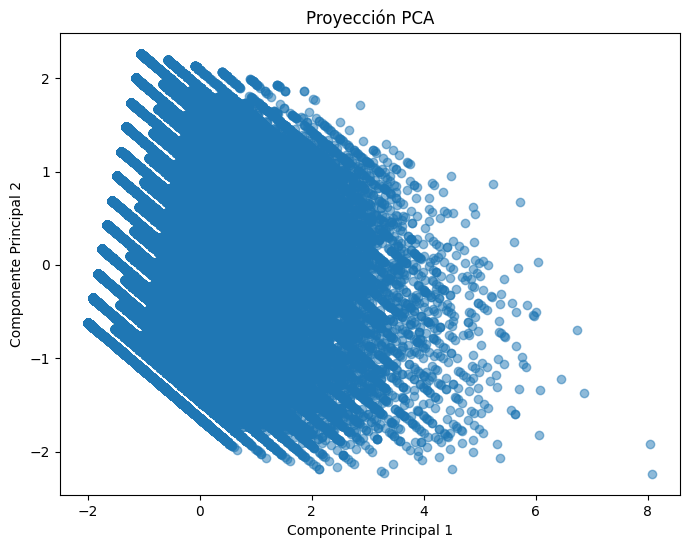

In [ ]:
# Seleccionamos estas variables numéricas
features_pca = ['edad', 'Medicamentos', 'mes_cita']

# Crear un dataframe solo con esas columnas
df_numeric = df_new[features_pca].dropna()# el dropna elimina los nulos

# Estandarización
scaler = StandardScaler()
variables_scaled = scaler.fit_transform(df_numeric)

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(variables_scaled)

# Imprimir la varianza explicada
print('Varianza explicada por cada componente principal: ', pca.explained_variance_ratio_)
print("Varianza total explicada: ", sum(pca.explained_variance_ratio_))

# Visualización en 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección PCA')
plt.show()


#Fase 4: Minería de Datos

##Aprendizaje no supervizado: Clustering método K-means para seleccionar el número de clusters
### Método 1 de codo para evaluar el número de clusters: Método del codo (Elbow)
### El método del codo indenfica un punto o codo en la gráfica de la suma de los errores cuadrados (SSE) frente el número de clusters. Este pundo suele identificar que el hecho de agregar más clusters no mejora la agrupación.

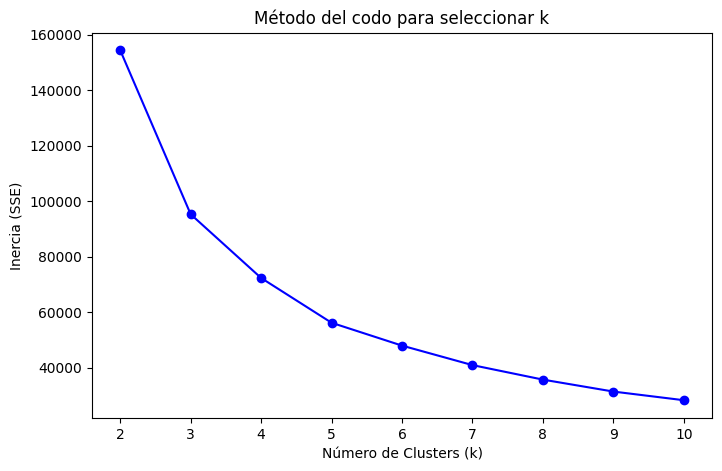

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supongamos que pca_result es un arreglo de shape"forma" (n_samples, 2) o (n_samples, n_components)
inertia_values = []

# Valores de k (números de clusters)
k_values = range(2, 11)  # Se evaluarán k entre 2 y 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia_values.append(kmeans.inertia_)

# Gráfica de la inercia versus número de clusters
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del codo para seleccionar k')
plt.show()

### Método 2: Método de la Silueta

Para k = 2, coeficiente de silueta: 0.3672
Para k = 3, coeficiente de silueta: 0.3957
Para k = 4, coeficiente de silueta: 0.3760
Para k = 5, coeficiente de silueta: 0.3778
Para k = 6, coeficiente de silueta: 0.3810
Para k = 7, coeficiente de silueta: 0.3788
Para k = 8, coeficiente de silueta: 0.3746
Para k = 9, coeficiente de silueta: 0.3720
Para k = 10, coeficiente de silueta: 0.3581


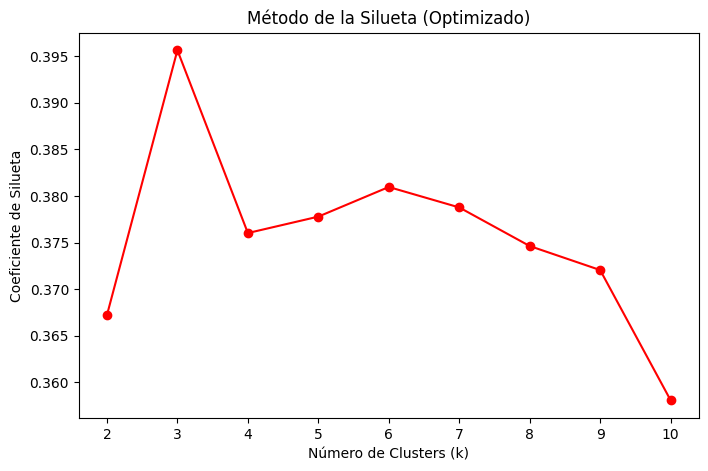

In [ ]:
# Definir el tamaño de la muestra (Ej: 20% de los datos si hay muchos puntos)
sample_size = min(10000, len(pca_result))  # Máximo 10000 puntos para acelerar
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")  # n_init="auto" acelera K-Means
    cluster_labels = kmeans.fit_predict(pca_result)

    # Calcular la silueta solo con una muestra de los datos
    sample_indices = np.random.choice(len(pca_result), sample_size, replace=False)
    silhouette_avg = silhouette_score(pca_result[sample_indices], cluster_labels[sample_indices])

    silhouette_scores.append(silhouette_avg)
    print(f'Para k = {k}, coeficiente de silueta: {silhouette_avg:.4f}')

# Gráfica del coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método de la Silueta (Optimizado)')
plt.show()

### Conclusión del coeficiente y Grafico de la silueta
 En el detalle de resultados anterior, donde se encuentra el coeficiente de silueta, podemos notar que los puntos se encuentran superpuestos en el limite entre los clusters debido a que el coeficiente mas elevado es 0,4033 es decir esta mas cercano a cero que a uno lo que indica separacion pero no tan marcada o sin espacio entre cada cluster, este coeficiente tambien indica que el numero correcto de clusters es **3** ya que tanto en el desglose de resultados como en la grafica es el valor mas alto y el punto mas elevado.

## **Entrenar K-means con el K optimo**

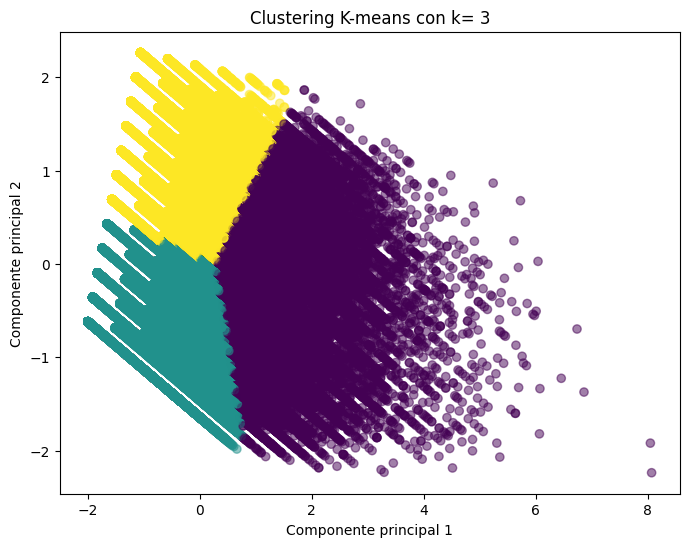

In [75]:
# Entrenar k-means con k optimo (por ejempi k=3)
k_optimo=3
kmeans_opt = KMeans(n_clusters=k_optimo, random_state=42)
clusters_opt = kmeans_opt.fit_predict(pca_result)

#crear un dataframe para graficar asumiendo 2 componentes en pca_reslut

df_cluster = pd.DataFrame(pca_result, columns=['PC1','PC2'])
df_cluster['Cluster'] = clusters_opt

df_cluster_means = df_cluster.groupby('Cluster').mean()

#Visualizar de los clusters
plt.figure(figsize=(8,6))
plt.scatter(df_cluster['PC1'], df_cluster['PC2'], c=df_cluster['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title(f'Clustering K-means con k= {k_optimo}')
plt.show()


K=2
➡ Inercia: 13540.11
➡ Coeficiente de Silueta: 0.3687

K=4
➡ Inercia: 6372.75
➡ Coeficiente de Silueta: 0.3755


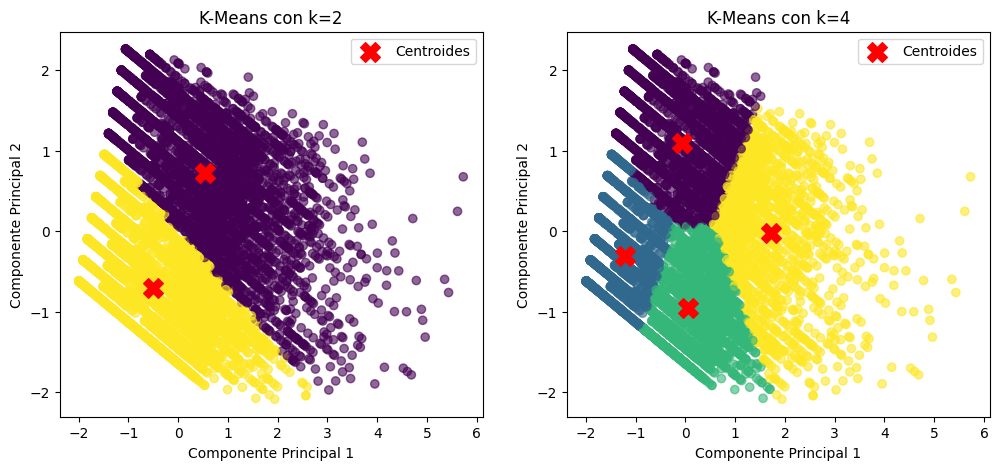

In [77]:
# Tomar una muestra aleatoria de máximo 10000 puntos para acelerar el cálculo
sample_size = min(10000, len(pca_result))
sample_indices = np.random.choice(len(pca_result), sample_size, replace=False)
pca_sample = pca_result[sample_indices]

# Valores de k a evaluar
k_values = [2, 4]

# Diccionarios para guardar métricas
inertia_values = {}
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(pca_sample)  # Aplicar K-means en la muestra

    # Inercia (cohesión del clúster)
    inertia_values[k] = kmeans.inertia_

    # Silueta (equilibrio entre cohesión y separación)
    silhouette_scores[k] = silhouette_score(pca_sample, labels)

# Mostrar resultados
for k in k_values:
    print(f"\nK={k}")
    print(f"➡ Inercia: {inertia_values[k]:.2f}")
    print(f"➡ Coeficiente de Silueta: {silhouette_scores[k]:.4f}")

# Gráfica de clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(pca_sample)

    axes[idx].scatter(pca_sample[:, 0], pca_sample[:, 1], c=labels, cmap='viridis', alpha=0.6)
    axes[idx].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
    axes[idx].set_title(f'K-Means con k={k}')
    axes[idx].set_xlabel('Componente Principal 1')
    axes[idx].set_ylabel('Componente Principal 2')
    axes[idx].legend()

plt.show()

## 4.2 Reglas de Asociación
### El Objetivo es descubrir relaciones interesantes entre variables categoricas como  sexo, est_civil, nivel_educacion, parroquia, etc

In [ ]:

# Seleccionar columnas categoricas
cols_assoc =['especialidad','sexo','parroquia','estado','tipo_atencion']

df_assoc = df_new[cols_assoc].dropna()

#convertir a variables dummies
df_encoded = pd.get_dummies(df_assoc)


4.4.4 Algoritmo apriori y generacion de reglas de asociación

In [79]:
# Itemsets frecuentes con soporte minimo de 0.05 (ajustar segun sus datos)
frequent_itemset = apriori(df_encoded, min_support=0.05, use_colnames=True)

# generar reglas de asociación con umbral de confianza de 0.6
rules = association_rules(frequent_itemset, metric="confidence", min_threshold=0.4)

#Reglas ordenadas por lift descendente para ver mas datos interesantes
rules_sorted = rules.sort_values('lift', ascending=False)

print(f"Reglas de asociación (top 10 por lift):")
display(rules_sorted.head(10))

Reglas de asociación (top 10 por lift):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
596,"(especialidad_GINECOLOGIA, estado_INCUMPLIDA)","(sexo_MUJER, tipo_atencion_PRIMERA)",0.013255,0.403207,0.011662,0.879814,2.182039,1.0,0.006318,4.965579,0.548990,0.028810,0.798614,0.454369
383,"(especialidad_UROLOGIA, tipo_atencion_SUBSECUE...",(sexo_HOMBRE),0.013449,0.392003,0.011011,0.818717,2.088550,1.0,0.005739,3.353862,0.528304,0.027915,0.701836,0.423403
586,"(parroquia_LEONIDAS PLAZA GUTIÉRREZ, especiali...","(sexo_MUJER, tipo_atencion_PRIMERA)",0.012050,0.403207,0.010140,0.841490,2.086991,1.0,0.005281,3.765019,0.527194,0.025029,0.734397,0.433319
250,(especialidad_GINECOLOGIA),"(sexo_MUJER, tipo_atencion_PRIMERA)",0.052582,0.403207,0.044114,0.838969,2.080738,1.0,0.022913,3.706070,0.548228,0.107158,0.730172,0.474189
592,"(especialidad_GINECOLOGIA, estado_ATENDIDA)","(sexo_MUJER, tipo_atencion_PRIMERA)",0.039326,0.403207,0.032452,0.825201,2.046593,1.0,0.016595,3.414174,0.532317,0.079135,0.707103,0.452843
378,"(especialidad_UROLOGIA, estado_ATENDIDA)",(sexo_HOMBRE),0.029583,0.392003,0.023395,0.790836,2.017425,1.0,0.011799,2.906798,0.519692,0.058753,0.655979,0.425258
87,(especialidad_UROLOGIA),(sexo_HOMBRE),0.038279,0.392003,0.030243,0.790067,2.015462,1.0,0.015237,2.896145,0.523890,0.075600,0.654713,0.433608
379,(especialidad_UROLOGIA),"(sexo_HOMBRE, estado_ATENDIDA)",0.038279,0.304232,0.023395,0.611175,2.008912,1.0,0.011749,1.789412,0.522207,0.073312,0.441157,0.344037
642,"(tipo_atencion_PRIMERA, especialidad_UROLOGIA,...",(sexo_HOMBRE),0.018668,0.392003,0.014514,0.777463,1.983311,1.0,0.007196,2.732123,0.505224,0.036637,0.633984,0.407244
380,"(tipo_atencion_PRIMERA, especialidad_UROLOGIA)",(sexo_HOMBRE),0.024830,0.392003,0.019232,0.774548,1.975874,1.0,0.009498,2.696793,0.506470,0.048370,0.629189,0.411804


##**Conclusiones:** existen varias relaciones entre variables pero varian dependiendo de las reglas establecidas.

Por ejemplo si el soporte es de minimo 0.05 tenemos las siguientes relaciones:

*  En la especialidad de Reumatologìa el 83% son mujeres y el 85% son atendidas, esto indica un porcentaje muy bajo de ausentismo en esta especialidad.

* Otra relacion que dentro de este support podemos destacar es que de las atenciones con estado:INCUMPLIDA y tipo de atencion: PRIMERA el 40.93%  son Hombres, este dato es importante ya que se puede planificar estrategias para rectificar la asistencia.

Pero si cambiamos el soporte y le damos valores minimos de 0.01 las relaciones descatadas seran:

* las atenciones hechas en UROLOGIA y de tipo SUBSECUENTE el 81% son de HOMBRES

* y que en general la mayoria de atenciones de UROLOGIA son hechas a Hombres y casi el 100%, para ser exacta el 99.59%  de GINECOLOGIA son MUJERES.

*Las especialidades de Nutrición y Psicología tienen lift cercano a 1, indicando poca o nula asociación con el género.

* La mayoría de especialidades tienen una confianza superior al 60% de asociación con pacientes mujeres.

* El soporte del consecuente (sexo_MUJER) es consistentemente 0.61, indicando que aproximadamente el 61% de todos los pacientes son mujeres.

## Aprndizaje Automatico
### Modelo: Red Neuronal (keras) para clasificacion Binaria

In [86]:
# Crear variable objetivo: 1 si es 'No Atendido', 0 si fue atendido
df_new['ausente'] = df_new['estado'].apply(lambda x: 1 if x == 'INCUMPLIDA' else 0)

# Variables predictoras
features_modelo = ['edad', 'sexo_cod', 'mes_cita', 'Medicamentos', 'Dispositivos', 'Insumos']

# X: variables de entrada / y: variable objetivo
X = df_new[features_modelo]
y = df_new['ausente']

In [87]:
# Escalar y dividir los datos
# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos: entrenamiento 80% / prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
# red neuronal con keras
# Definir arquitectura del modelo
model = Sequential()
# Capa 1 con regularización L2 y Dropout
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))  # Dropout del 30%

# Capa 2 con regularización L2 y Dropout
model.add(Dense(16, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))  # Otro Dropout

# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # Clasificación binaria

# Compilación
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7173 - loss: 0.6800 - val_accuracy: 0.7844 - val_loss: 0.4409
Epoch 2/20
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7834 - loss: 0.4468 - val_accuracy: 0.7844 - val_loss: 0.4301
Epoch 3/20
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7823 - loss: 0.4382 - val_accuracy: 0.7844 - val_loss: 0.4244
Epoch 4/20
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7828 - loss: 0.4306 - val_accuracy: 0.7844 - val_loss: 0.4202
Epoch 5/20
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7808 - loss: 0.4281 - val_accuracy: 0.7844 - val_loss: 0.4174
Epoch 6/20
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7847 - loss: 0.4218 - val_accuracy: 0.7844 - val_loss: 0.4144
Epoch 7/20
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7833 - loss: 0.4175 - val_accuracy: 0.7844 - val_loss: 0.4122
Epoch 8/20
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7851 - loss: 0.4153 - 

In [96]:
# Evaluación
loss, acc = model.evaluate(X_test, y_test)
print(f"Precisión en datos de prueba: {acc:.4f}")

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7806 - loss: 0.4067
Precisión en datos de prueba: 0.7841


##Fase 5: Evaluación e Interpretación
###Visualizacion y presentación

Entrenando con 20 epochs y 64 batch_size el modelo tiene una presición del 78.44% volvemo a entrenar el modelo pero esta vez con 10 epochs para revisar si mejora la presición de los datos, pero la presición se mantiene.

711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9270    0.6361    0.7545     17816
           1     0.3824    0.8182    0.5212      4907

    accuracy                         0.6754     22723
   macro avg     0.6547    0.7271    0.6378     22723
weighted avg     0.8094    0.6754    0.7041     22723

Matriz de confusión:
[[11332  6484]
 [  892  4015]]
AUC-ROC: 0.7726


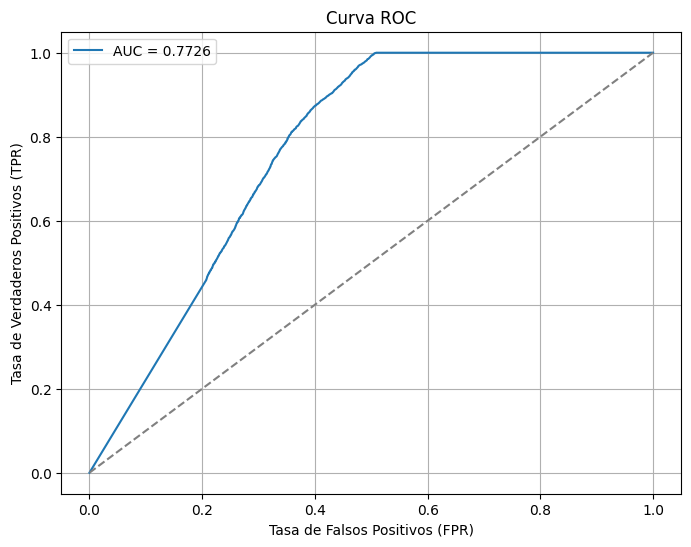

In [90]:
# Predicciones en el conjunto de prueba
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.3).astype(int)

# Reporte de métricas
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_mat)

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.4f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

 **Reporte de clasificación:(antes de la regularización)**

El reporte de clasificación muestra las métricas de evaluación para cada una de las clases ( "0" para atendido y "1" para ausente):

**Clase 0 (Atendido):**

**Precision (0.7850):** El modelo tiene una precisión del 78.5% al predecir que un paciente ha sido atendido. Esto significa que de todas las predicciones que el modelo hizo como "atendido", el 78.5% eran correctas.

**Recall (0.9979):** El modelo tiene un recall muy alto para esta clase, lo que significa que está detectando casi todos los pacientes que realmente fueron atendidos (99.79%). Aunque el modelo detecta casi todos los pacientes atendidos, esto puede ser por el desequilibrio de clases.

**F1-Score (0.8787):** El F1-Score es un balance entre precisión y recall. Un valor de 0.8787 significa que el modelo es bastante bueno para predecir correctamente la clase 0 (atendido).

**Clase 1 (No Atendido / Ausente):**

**Precision (0.5000):** El modelo tiene una precisión del 50% para predecir que un paciente no ha sido atendido (ausente). Esto significa que, de todas las veces que el modelo predijo "ausente", la mitad fueron correctas.

**Recall (0.0075):** Este es un valor muy bajo, lo que indica que el modelo está perdiendo casi todos los pacientes que realmente no fueron atendidos. Solo detecta el 0.75% de los pacientes ausentes. Este valor muy bajo sugiere que el modelo tiene dificultades para detectar correctamente a los pacientes ausentes.

**F1-Score (0.0149):** Este es muy bajo debido al mal desempeño del modelo para la clase "ausente". Un F1-score bajo indica que el modelo está fallando en encontrar la clase minoritaria.

**Accuracy (0.7841):** La exactitud global del modelo es 78.41%, lo que significa que el modelo está correctamente prediciendo 78.41% de las veces en general, pero esta métrica puede ser engañosa cuando las clases están desbalanceadas (lo cual es el caso aquí).

**Macro Average:**

Calcula las métricas (precisión, recall, F1-score) promediadas entre las clases sin tener en cuenta el desbalance de clases. Aquí, el modelo tiene un recall de 0.5027 y una precisión de 0.6425, lo que muestra que el modelo tiene un desempeño bastante bueno para la clase mayoritaria (atendidos), pero no tanto para la clase minoritaria (ausentes).

**Weighted Average:**

En este caso, las métricas se calculan con peso proporcional según el tamaño de cada clase. Es decir, se toma en cuenta el número de ejemplos en cada clase (más de 17,000 para la clase "0" y menos de 5,000 para la clase "1"). Los valores ponderados son más altos debido al predominio de la clase "0" (atendido).

**2. Matriz de confusión:**


**True Negatives (TN):** 17,779 pacientes fueron correctamente clasificados como atendidos.

**False Positives (FP):** 37 pacientes fueron incorrectamente clasificados como ausentes cuando en realidad estaban atendidos.

**False Negatives (FN):** 4,870 pacientes fueron incorrectamente clasificados como atendidos, aunque en realidad no asistieron.

**True Positives (TP): 37** pacientes fueron correctamente clasificados como ausentes.

Esto muestra que el modelo tiene un gran problema con la clase minoritaria (ausente), ya que no está prediciendo correctamente los casos de "ausente". Aunque la mayoría de los pacientes son correctamente clasificados como "atendidos", el modelo no detecta casi ningún paciente "ausente" (solo 37 de 4,907).

**3. AUC-ROC: 0.7800**
**AUC (Area Under the Curve)** es una medida global del desempeño del modelo. Un AUC de 0.7800 indica que el modelo tiene un buen desempeño general, pero no es perfecto.

**AUC cerca de 1** indica un modelo excelente que clasifica correctamente casi todos los puntos.

**AUC cerca de 0.5** indica un modelo que no tiene poder discriminatorio (similar a un modelo aleatorio).

Un AUC de **0.7800 **es bastante bueno, pero aún puede mejorar, especialmente en la detección de la clase "ausente".

### Modelo: Probaremos con RANDOM FOREST

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Crear el modelo Random Forest con ajuste de pesos para la clase desbalanceada
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluación
print("Reporte de clasificación Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Matriz de confusión Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# AUC-ROC
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC-ROC Random Forest: {auc_roc_rf:.4f}")

# Validación cruzada para mejorar la evaluación
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Validación cruzada AUC-ROC: {cv_scores.mean():.4f}")

Reporte de clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.57      0.71     17816
           1       0.36      0.87      0.51      4907

    accuracy                           0.64     22723
   macro avg       0.65      0.72      0.61     22723
weighted avg       0.82      0.64      0.67     22723

Matriz de confusión Random Forest:
[[10206  7610]
 [  616  4291]]
AUC-ROC Random Forest: 0.7707
Validación cruzada AUC-ROC: 0.7481


El Random Forest mejora en la matriz de confuscion los valores pero siguen siendo valores generales de 70% que podrian mejorar.
Haremos un balanceo de clases con SMOTE para revisar si mejora.


In [92]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entrenar Random Forest con los datos balanceados
rf_model_smote = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Evaluar el modelo
y_pred_rf_smote = rf_model_smote.predict(X_test)
print(classification_report(y_test, y_pred_rf_smote))



              precision    recall  f1-score   support

           0       0.93      0.58      0.72     17816
           1       0.36      0.85      0.50      4907

    accuracy                           0.64     22723
   macro avg       0.65      0.72      0.61     22723
weighted avg       0.81      0.64      0.67     22723



**Resultados después de aplicar SMOTE:**

**1. Reporte de clasificación:**

**Clase 0 (Atendido): **

**Precisión (0.93):** La precisión sigue siendo alta para la clase "atendido", indicando que cuando el modelo predice "atendido", es correcto el 93% de las veces.

**Recall (0.58):** El recall sigue siendo relativamente bajo para la clase "atendido", lo que significa que el modelo aún no está recuperando el total de los casos "atendidos" de forma efectiva.

**Clase 1 (Ausente):**

**Precisión (0.36):** La precisión sigue siendo baja para la clase "ausente". Esto es esperado, ya que, al balancear las clases, el modelo ahora tiene más ejemplos de "ausentes", pero aún predice muchos falsos positivos.

**Recall (0.85): ** El recall es bastante bueno para la clase "ausente", ya que el modelo logra identificar correctamente el 85% de las instancias "ausentes", lo cual es una mejora notable comparado con Random Forest sin balanceo de clases (donde el recall era más bajo).

### Modelo: Probaremos XGBoost, que tiene excelentes capacidades para manejar el desbalance de clases mediante el parámetro scale_pos_weight y podría ser una mejor opción para mejorar el recall de la clase "ausente".

In [93]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Crear el modelo XGBoost con ajuste para el desbalanceo de clases
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train) / sum(y_train), random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Evaluación
print("Reporte de clasificación XGBoost:")
print(classification_report(y_test, y_pred_xgb))

print("Matriz de confusión XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))

# AUC-ROC
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"AUC-ROC XGBoost: {auc_roc_xgb:.4f}")

# Validación cruzada para mejorar la evaluación
cv_scores_xgb = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Validación cruzada AUC-ROC: {cv_scores_xgb.mean():.4f}")

Reporte de clasificación XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.50      0.67     17816
           1       0.35      0.99      0.52      4907

    accuracy                           0.61     22723
   macro avg       0.67      0.75      0.59     22723
weighted avg       0.86      0.61      0.64     22723

Matriz de confusión XGBoost:
[[8963 8853]
 [  54 4853]]
AUC-ROC XGBoost: 0.7793
Validación cruzada AUC-ROC: 0.7560


<ipython-input-94-314a845253ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_40_parroquias.values, y=top_40_parroquias.index, palette="Reds_r")


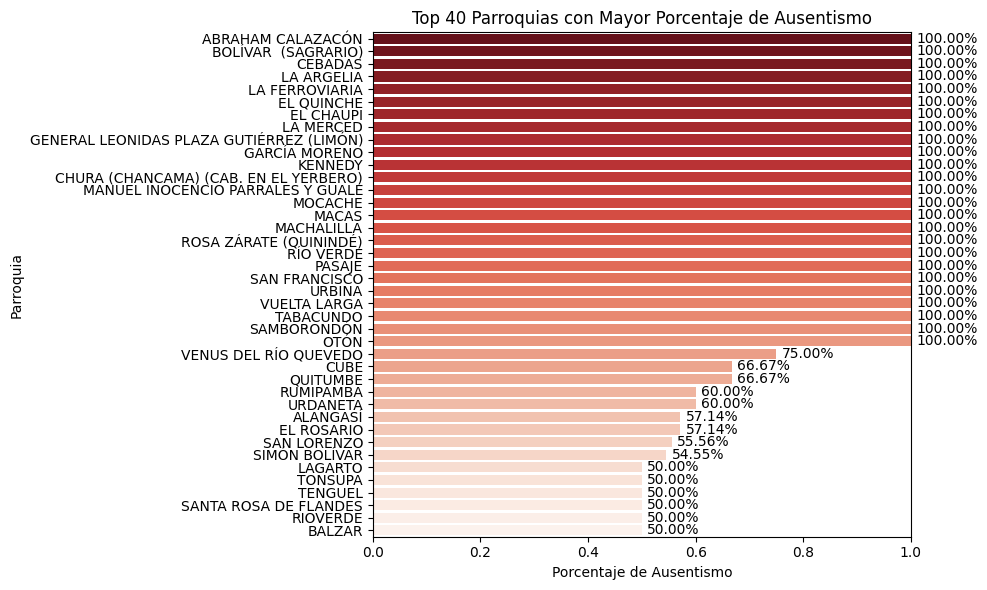

In [94]:
# Calcular porcentaje de ausentismo por parroquia
ausentismo_por_parroquia = df_new.groupby('parroquia')['ausente'].mean().sort_values(ascending=False)

# Tomar solo las 40 primeras
top_40_parroquias = ausentismo_por_parroquia.head(40)

# Visualización
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_40_parroquias.values, y=top_40_parroquias.index, palette="Reds_r")
plt.title('Top 40 Parroquias con Mayor Porcentaje de Ausentismo')
plt.xlabel('Porcentaje de Ausentismo')
plt.ylabel('Parroquia')
plt.xlim(0, 1)

# Agregar los valores de porcentaje sobre las barras
for i, value in enumerate(top_40_parroquias.values):
    plt.text(value + 0.01, i, f"{value:.2%}", va='center')  # .2% para mostrar como porcentaje

plt.tight_layout()
plt.show()

<ipython-input-95-2174946b6133>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_40_parroquias.values, y=top_40_parroquias.index, palette="Reds_r")


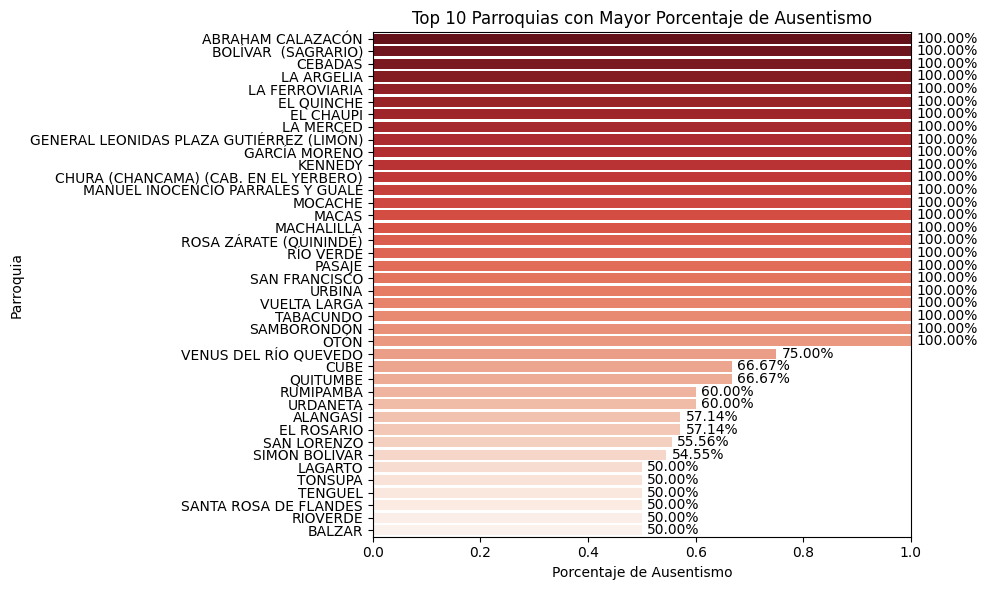

In [95]:
# Calcular porcentaje de ausentismo por parroquia
ausentismo_por_parroquia = df_new.groupby('parroquia')['ausente'].mean().sort_values(ascending=False)

# Tomar solo las 40 primeras
top_40_parroquias = ausentismo_por_parroquia.head(40)

# Visualización
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_40_parroquias.values, y=top_40_parroquias.index, palette="Reds_r")
plt.title('Top 10 Parroquias con Mayor Porcentaje de Ausentismo')
plt.xlabel('Porcentaje de Ausentismo')
plt.ylabel('Parroquia')
plt.xlim(0, 1)

# Agregar los valores de porcentaje sobre las barras
for i, value in enumerate(top_40_parroquias.values):
    plt.text(value + 0.01, i, f"{value:.2%}", va='center')  # .2% para mostrar como porcentaje

plt.tight_layout()
plt.show()